Exploring the output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project - preliminary runs

- scenario 1: 1-year discharge for Jan - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2023
- scenario 3: 10-year discharge for Jan 2019 - Dec 2028

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups

## Group plotting functions

In [2]:

# Plot variables
label_size = 11
font_size = 12
line_width = 2

def plot_benthic(group, scenario): # benthos, shellfish

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of benthic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim(y_min,  y_max)

    for species in group:
        benthic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        benthic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:], np.nan)
        ratio = benthic_oiled.sum(axis=1) / benthic_control.sum(axis=1) 
        control_ratio = benthic_control.sum(axis=1)  / benthic_control.sum(axis=1) 
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group) #, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

def plot_pelagic(group, scenario): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of pelagic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim([0.99, 1.01])

    for species in group:
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes, take only water column layers
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        ratio = p_oiled.sum(axis=1) / p_control.sum(axis=1) 
        control_ratio = p_control.sum(axis=1) / p_control.sum(axis=1)
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

def plot_bacteria(scenario):

    bacteria = groups.bacteria

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim([y_min, y_max])

    for species in bacteria:
        if "pelagic" in species:
            bact_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,:,0:5], np.nan) # tonnes, take only water column layers
            bact_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,:,0:5,], np.nan)
            b_oiled = bact_oiled.sum(axis=2)
            b_control = bact_control.sum(axis=2)
        else:
            b_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,:,6], np.nan) # tonnes, take only sediment layer
            b_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,:,6], np.nan)
        
        ratio = b_oiled.sum(axis=1) / b_control.sum(axis=1) 
        control_ratio = b_control.sum(axis=1) / b_control.sum(axis=1)
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(bacteria, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

def plot_sediment(group, scenario): #mostly for sediment_feeders

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim([y_min, y_max])

    for species in group:
        sed_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,6], np.nan) # tonnes
        sed_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,6], np.nan)
        s_oiled = sed_oiled.sum(axis=1)
        s_control = sed_control.sum(axis=1)
        ratio = s_oiled / s_control
        control_ratio = s_control / s_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)


In [7]:
def plot_cohorts(group):

    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.5
    y_max = 1.5

    fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
    ax[0].set_title('Numbers - all cohorts', fontsize = font_size)
    ax[0].set_ylabel('scenario : control')
    ax[0].tick_params(labelsize=label_size)
    ax[0].set_ylim([y_min, y_max])

    ax[1].set_title('Structural Nitrogen (bone size) - all cohorts', fontsize = font_size)
    ax[1].set_ylabel('scenario : control')
    ax[1].tick_params(labelsize=label_size)
    ax[1].set_ylim([y_min, y_max])

    ax[2].set_title('Reserve Nitrogen (fatty tissue) - all cohorts', fontsize = font_size)
    ax[2].set_ylabel('scenario : control')
    ax[2].tick_params(labelsize=label_size)
    ax[2].set_ylim([y_min, y_max])

    for species in group:

        numCohorts = cohorts[group[species]]

        o1_numbers = np.ma.zeros((scenario.variables[group[species] + '1_Nums'].shape),dtype = np.int32)
        o1_structuralN = np.ma.zeros((scenario.variables[group[species] + '1_StructN'].shape),dtype = np.int32)
        o1_reservedN = np.ma.zeros((scenario.variables[group[species] + '1_ResN'].shape),dtype = np.int32)

        c1_numbers = np.ma.zeros((control.variables[group[species] + '1_Nums'].shape),dtype = np.int32)
        c1_structuralN = np.ma.zeros((control.variables[group[species] + '1_StructN'].shape),dtype = np.int32)
        c1_reservedN = np.ma.zeros((control.variables[group[species] + '1_ResN'].shape),dtype = np.int32)    

        for cohort in range (1, numCohorts+1):

            new_species = group[species] + str(cohort)
        
            o1_numbers = o1_numbers + np.ma.filled(scenario.variables[new_species + '_Nums'][:,:,:], np.nan)
            o1_structuralN = o1_structuralN + np.ma.filled(scenario.variables[new_species +'_StructN'][:,:,:], np.nan)
            o1_reservedN = o1_reservedN + np.ma.filled(scenario.variables[new_species +'_ResN'][:,:,:], np.nan)

            c1_numbers = c1_numbers + np.ma.filled(control.variables[new_species + '_Nums'][:,:,:], np.nan)
            c1_structuralN = c1_structuralN + np.ma.filled(control.variables[new_species +'_StructN'][:,:,:], np.nan)
            c1_reservedN = c1_reservedN + np.ma.filled(control.variables[new_species +'_ResN'][:,:,:], np.nan)

        o2_numbers = o1_numbers.sum(axis=2)
        o2_structuralN = o1_structuralN.sum(axis=2)
        o2_reservedN = o1_reservedN.sum(axis=2)

        c2_numbers = c1_numbers.sum(axis=2)
        c2_structuralN = c1_structuralN.sum(axis=2)
        c2_reservedN = c1_reservedN.sum(axis=2)

        numbers = o2_numbers.sum(axis=1) / c2_numbers.sum(axis=1)
        structuralN = o2_structuralN.sum(axis=1) / c2_structuralN.sum(axis=1)
        reservedN = o2_reservedN.sum(axis=1) / c2_reservedN.sum(axis=1)
    
        ax[0].plot(time, numbers[start:end], linewidth = line_width)
        ax[0].legend(group, loc='center left')
        ax[0].plot([event_start, event_start], [y_min, y_max], 'r', alpha=0.1)
        ax[0].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
   
        ax[1].plot(time, structuralN[start:end],linewidth = line_width)
        ax[1].plot([event_start, event_start], [y_min, y_max], 'r', alpha=0.1)
        ax[1].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

        ax[2].plot(time, reservedN[start:end],linewidth = line_width)
        ax[2].plot([event_start, event_start], [y_min, y_max], 'r', alpha=0.1)
        ax[2].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

    return fig, ax
    

In [122]:
def plot_benthic_box(group, scenario, box_number): # benthos, shellfish

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of benthic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim(y_min, y_max)

    for species in group:
        benthic_oiled = scenario.variables[group[species] + '_N'][start:end,box_number] # tonnes
        benthic_control = control.variables[group[species] + '_N'][start:end,box_number]
        ratio = benthic_oiled / benthic_control
        control_ratio = benthic_control / benthic_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)

def plot_bacteria_box(scenario, box_number): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim([y_min, y_max])

    for species in groups.bacteria:
        if "pelagic" in species:
            bact_oiled = np.ma.filled(scenario.variables[groups.bacteria[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes, take only water column layers
            bact_control = np.ma.filled(control.variables[groups.bacteria[species] + '_N'][start:end,box_number,0:5], np.nan)
            b_oiled = bact_oiled.sum(axis=1)
            b_control = bact_control.sum(axis=1)
        else:
            b_oiled = np.ma.filled(scenario.variables[groups.bacteria[species] + '_N'][start:end,box_number,6], np.nan) # tonnes, take only sediment layer
            b_control = np.ma.filled(control.variables[groups.bacteria[species] + '_N'][start:end,box_number,6], np.nan)
        
        ratio = b_oiled / b_control
        control_ratio = b_control / b_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(groups.bacteria, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)

def plot_pelagic_box(group, scenario, box_number): #bacteria, plankton
    
    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of pelagic groups in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
    #ax.set_ylim([0.99, 1.01])

    for species in group:
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        ratio = p_oiled / p_control
        control_ratio = p_control / p_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)

def plot_sediment_box(group, scenario, box_number): #mostly for sediment_feeders

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim([y_min, y_max])

    for species in group:
        s_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,6], np.nan) # tonnes
        s_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,6], np.nan)
        ratio = s_oiled / s_control
        control_ratio = s_control / s_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(event_start, 1, 'ro', alpha=0.5)

def plot_pelagic_biomass_box(group, scenario, box_number):

    for species in group:
        fig, ax = plt.subplots(figsize = (14,3))
        ax.tick_params(labelsize=label_size)
        ax.set_ylabel('mg N/m^3')
        ax.set_title('Biomass of ' + str(group[species]) + ' in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
        #ax.set_ylim([y_min, y_max])
        
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        p_max = p_oiled.max()
        p_min = p_oiled.min()
        ax.plot(time, p_oiled, linewidth = 2)
        ax.plot(time, p_control, 'k',linewidth = 2)
        ax.plot([event_start,event_start],[p_min, p_max], 'r', alpha=0.5)

def plot_benthic_biomass_box(group, scenario, box_number): 

    for species in group:
        fig, ax = plt.subplots(figsize = (14,3))
        ax.tick_params(labelsize=label_size)
        ax.set_ylabel('mg N/m^3')
        ax.set_title('Biomass of ' + str(group[species]) + ' in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
        #ax.set_ylim([y_min, y_max])
        
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number], np.nan)
        p_oiled = pelagic_oiled
        p_control = pelagic_control
        p_max = p_oiled.max()
        p_min = p_oiled.min()
        ax.plot(time, p_oiled, linewidth = 2)
        ax.plot(time, p_control, 'k',linewidth = 2)
        ax.plot([event_start,event_start],[p_min, p_max], 'r', alpha=0.5)

def plot_sediment_biomass_box(group, scenario, box_number): 

    for species in group:
        fig, ax = plt.subplots(figsize = (14,3))
        ax.tick_params(labelsize=label_size)
        ax.set_ylabel('mg N/m^3')
        ax.set_title('Biomass of ' + str(group[species]) + ' in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
        #ax.set_ylim([y_min, y_max])
        
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,6], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,6], np.nan)
        p_oiled = pelagic_oiled
        p_control = pelagic_control
        p_max = p_oiled.max()
        p_min = p_oiled.min()
        ax.plot(time, p_oiled, linewidth = 2)
        ax.plot(time, p_control, 'k',linewidth = 2)
        ax.plot([event_start,event_start],[p_min, p_max], 'r', alpha=0.5)

def plot_surface_biomass_box(group, scenario, box_number): # benthos, shellfish

    for species in group:
        fig, ax = plt.subplots(figsize = (14,3))
        ax.tick_params(labelsize=label_size)
        ax.set_ylabel('mg N/m^3')
        ax.set_title('Biomass of ' + str(group[species]) + ' in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
        #ax.set_ylim([y_min, y_max])

        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,4:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,4:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        p_max = p_oiled.max()
        p_min = p_oiled.min()
        ax.plot(time, p_oiled, linewidth = 2)
        ax.plot(time, p_control, 'k',linewidth = 2)
        ax.plot([event_start,event_start],[p_min, p_max], 'r', alpha=0.5)
        #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

## High [Phe], High Resolution

In [8]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_3y_highres_control/outputSalishSea.nc"
scenario1e6_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_3y_highres_1000000/outputSalishSea.nc"
scenario1e5_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_3y_highres_100000/outputSalishSea.nc"
scenario1e4_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_3y_highres_10000/outputSalishSea.nc"
scenario1e3_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_3y_highres_1000/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario_1e3 = xr.open_dataset(str(scenario1e3_file), decode_cf=True)
scenario_1e4 = xr.open_dataset(str(scenario1e4_file), decode_cf=True)
scenario_1e5 = xr.open_dataset(str(scenario1e5_file), decode_cf=True)
scenario_1e6 = xr.open_dataset(str(scenario1e6_file), decode_cf=True)
t = np.ma.filled(scenario_1e6.variables['t'], np.nan)

In [52]:
start = 375
end = 400
#end = t.size-1

#event_start = np.datetime64('1993-05-01')

time = t[start:end]

In [35]:
t.size

1096

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

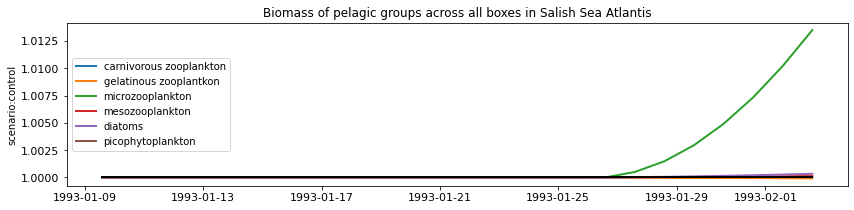

In [53]:
plot_pelagic(groups.plankton, scenario_1e6)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

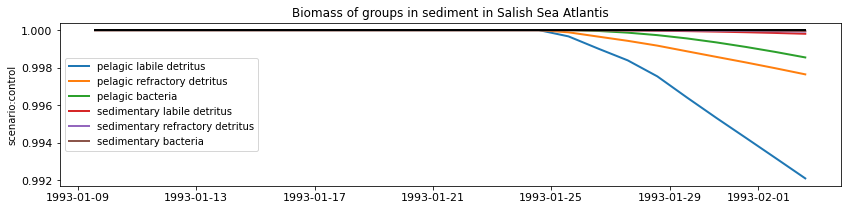

In [54]:
plot_bacteria(scenario_1e6)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

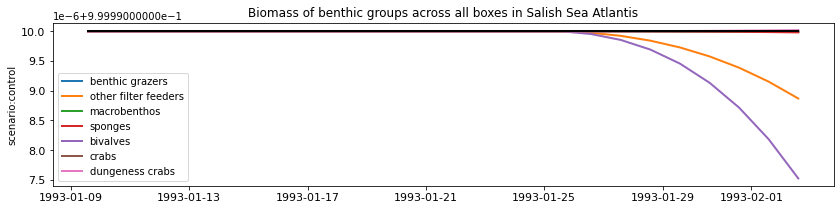

In [55]:
plot_benthic(groups.benthic_invertebrates, scenario_1e6)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

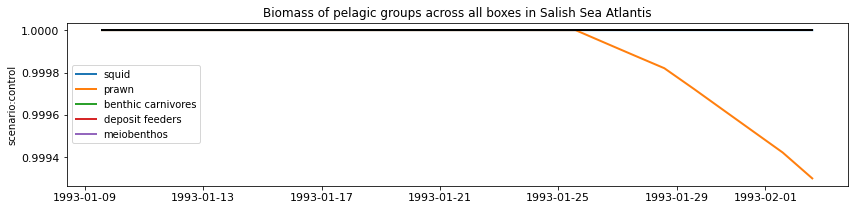

In [56]:
plot_pelagic(groups.pelagic_invertebrates, scenario_1e6)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

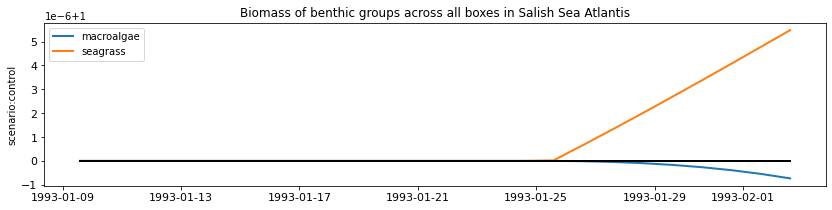

In [57]:
plot_benthic(groups.macroalgae, scenario_1e6)

/tmp/ipykernel_318519/350552809.py:84: RuntimeWarning: invalid value encountered in true_divide
  ratio = p_oiled / p_control
/tmp/ipykernel_318519/350552809.py:85: RuntimeWarning: invalid value encountered in true_divide
  control_ratio = p_control / p_control


(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

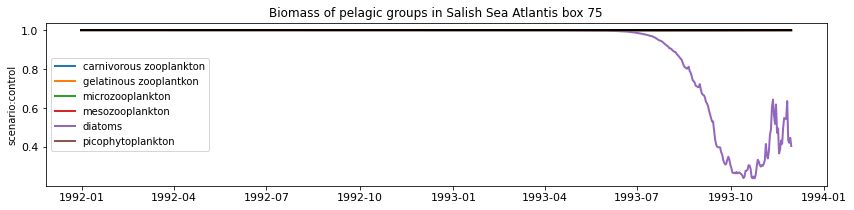

In [25]:
plot_pelagic_box(groups.plankton, scenario_1e6, 75)

### Surface only for Vancouver Harbour (Box 75)

In [168]:
def plot_biomass_box(group, scenario, box_number): # benthos, shellfish

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('mg N/m^3')
    ax.set_title('Biomass of pelagic groups in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
    #ax.set_ylim([y_min, y_max])
    
    pelagic_oiled = np.ma.filled(scenario.variables[group + '_N'][start:end,box_number,0:5], np.nan) # tonnes
    pelagic_control = np.ma.filled(control.variables[group + '_N'][start:end,box_number,0:5], np.nan)
    p_oiled = pelagic_oiled.sum(axis=1)
    p_control = pelagic_control.sum(axis=1)
    p_max = p_oiled.max()
    p_min = p_oiled.min()
    ax.plot(time, p_oiled, linewidth = 2)
    ax.plot(time, p_control, 'k',linewidth = 2)
    ax.plot([event_start,event_start],[p_min, p_max], 'r', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

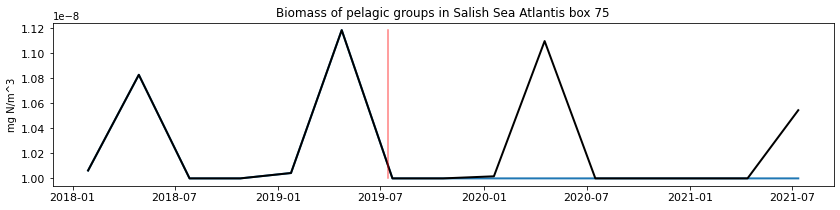

In [171]:
plot_biomass_box('Diatom', scenario_highres, 75)

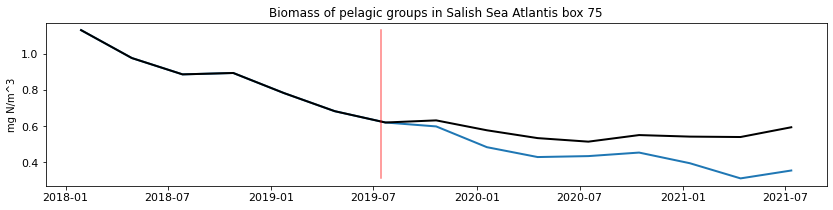

In [170]:
plot_biomass_box('Lab_Det', scenario_1e6, 75)

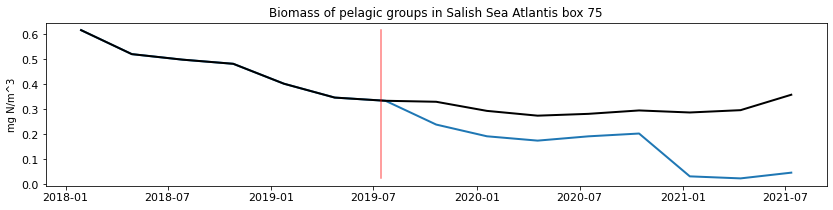

In [87]:
plot_biomass_box('Ref_Det', scenario_1e6, 75)

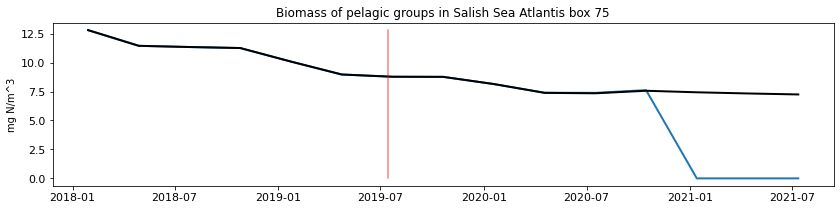

In [88]:
plot_biomass_box('Prawn', scenario_1e6, 75)

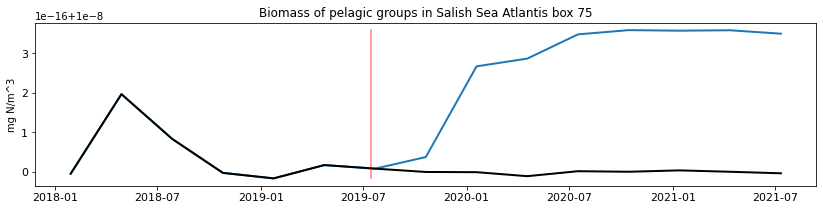

In [90]:
plot_biomass_box('Zoo', scenario_1e6, 75)

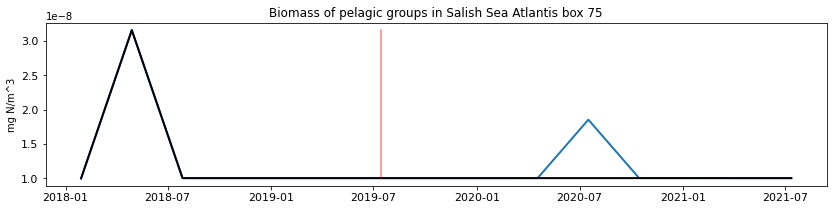

In [92]:
plot_biomass_box('MicroZoo', scenario_1e6, 75)

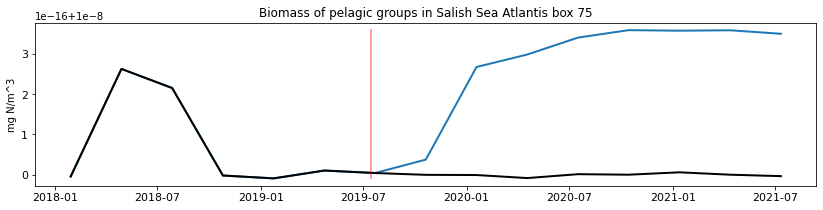

In [94]:
plot_biomass_box('Gelat_Zoo', scenario_1e6, 75)

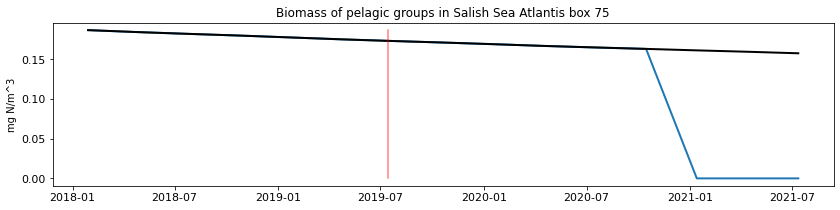

In [95]:
plot_biomass_box('Carniv_Zoo', scenario_1e6, 75)

## High res: box 75

In [136]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_03_control/outputSalishSea.nc"
scenariohr_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_1000_2/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario_highres = xr.open_dataset(str(scenariohr_file), decode_cf=True)
t = np.ma.filled(scenario_1e6.variables['t'], np.nan)

In [149]:
start = 45
end = 60
#end = t.size-1

event_start = np.datetime64('2019-07-15')

time = t[start:end]

label_size = 11
font_size = 12
line_width = 2

In [ ]:
plot_pelagic_box(groups.salmon, scenario_highres, 75)

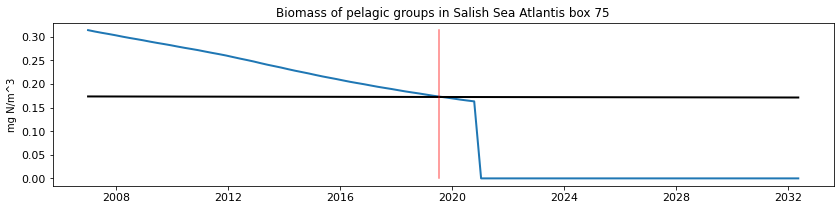

In [105]:
plot_biomass_box('Carniv_Zoo', scenario_1e6, 75)

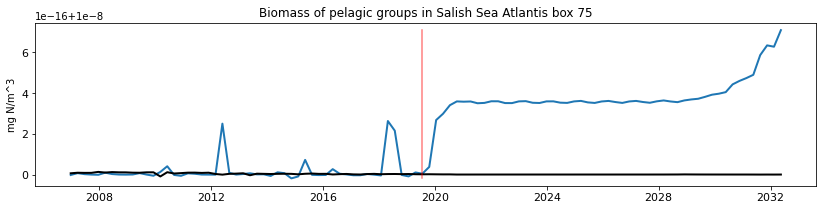

In [106]:
plot_biomass_box('Gelat_Zoo', scenario_1e6, 75)

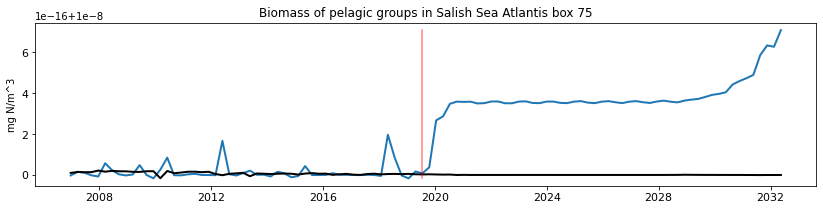

In [107]:
plot_biomass_box('Zoo', scenario_1e6, 75)

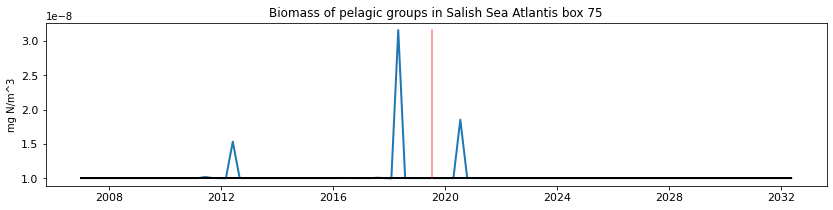

In [108]:
plot_biomass_box('MicroZoo', scenario_1e6, 75)

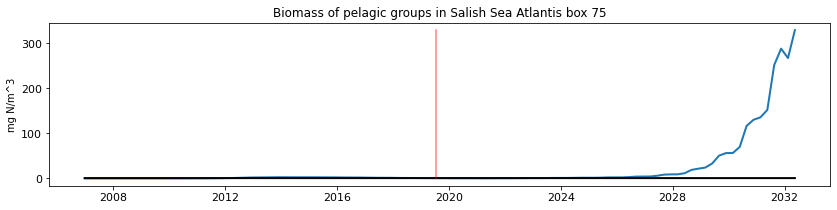

In [109]:
plot_biomass_box('Lab_Det', scenario_1e6, 75)

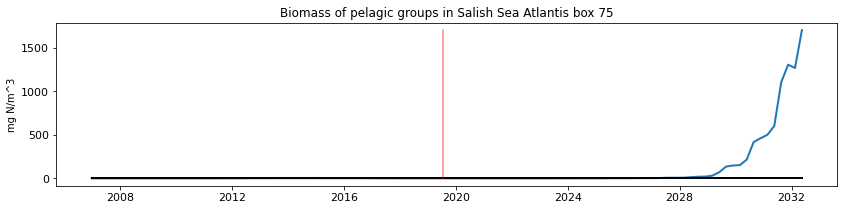

In [110]:
plot_biomass_box('Ref_Det', scenario_1e6, 75)

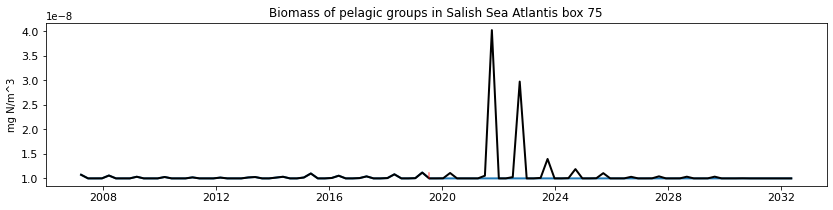

In [142]:
plot_biomass_box('Diatom', scenario_highres, 75)

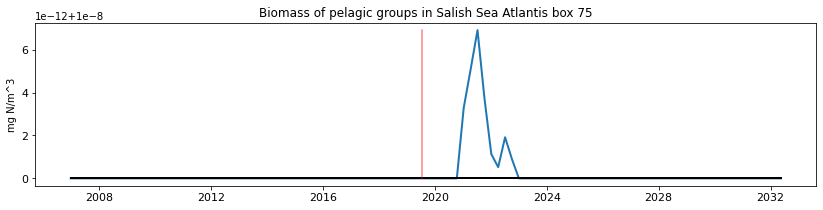

In [113]:
plot_biomass_box('PicoPhytopl', scenario_1e6, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

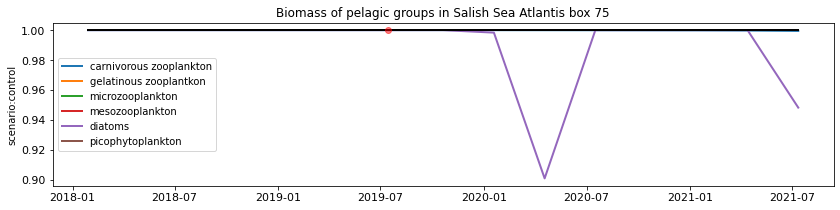

In [150]:
plot_pelagic_box(groups.plankton, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

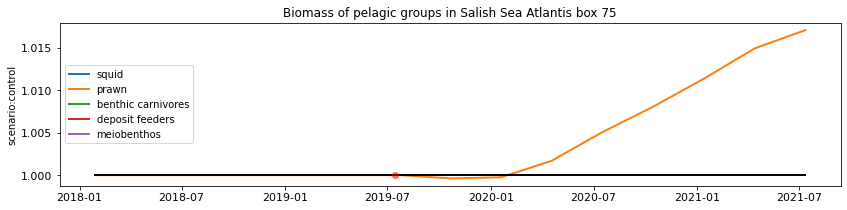

In [151]:
plot_pelagic_box(groups.pelagic_invertebrates, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

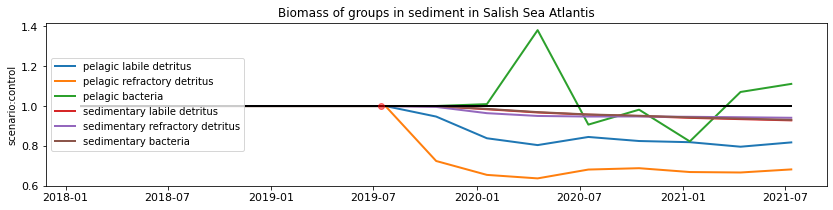

In [153]:
plot_bacteria_box(scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

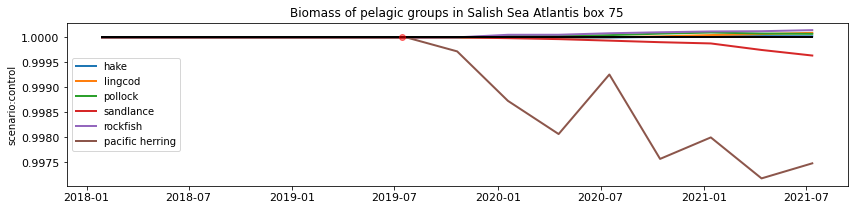

In [156]:
plot_pelagic_box(groups.named_fish, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

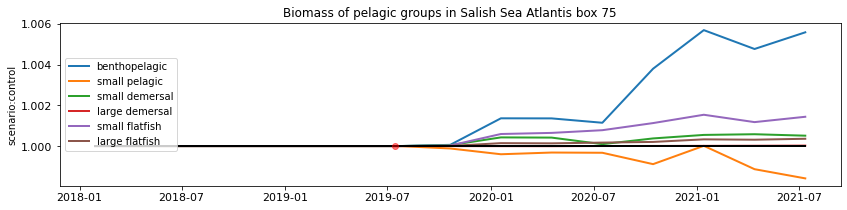

In [157]:
plot_pelagic_box(groups.other_fish, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

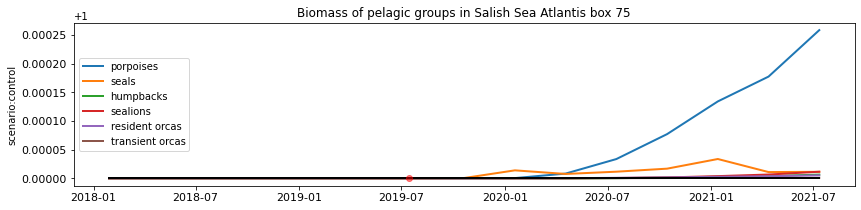

In [152]:
plot_pelagic_box(groups.mammals, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

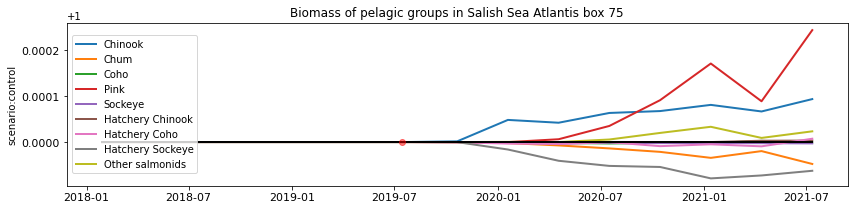

In [154]:
plot_pelagic_box(groups.salmon, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 75'}, ylabel='scenario:control'>)

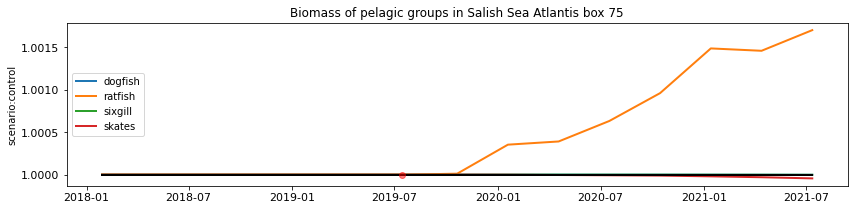

In [158]:
plot_pelagic_box(groups.sharks, scenario_highres, 75)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

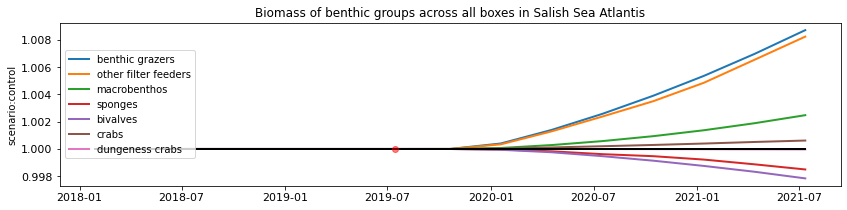

In [159]:
plot_benthic_box(groups.benthic_invertebrates, scenario_highres, 75)